In [1]:
import gymnasium as gym

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from scipy.stats import multivariate_normal
from sklearn import linear_model
#from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from matplotlib.colors import LogNorm
import random
from tqdm import tqdm

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

## OpenAI Gym

In [2]:
env = gym.make('FrozenLake-v1', render_mode="ansi")
env.reset();
for _ in range(5):
    print(env.render())
    env.step(env.action_space.sample()) # take a random action
env.close()


SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Up)
SFFF
FHFH
FFFH
HFFG



## TD-–æ–±—É—á–µ–Ω–∏–µ: on-policy (Sarsa)

## SARSA (on-policy TD control) –¥–ª—è –æ—Ü–µ–Ω–∫–∏ Q ‚âà q\*

**–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å** Q(s, a) –¥–ª—è –≤—Å–µ—Ö s ‚àà S, a ‚àà A(s) –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏,  
–∏ —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å Q(terminal-state, ¬∑) = 0

**–ü–æ–≤—Ç–æ—Ä—è—Ç—å** (–¥–ª—è –∫–∞–∂–¥–æ–≥–æ —ç–ø–∏–∑–æ–¥–∞):
- –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Å–æ—Å—Ç–æ—è–Ω–∏–µ **S**
- –í—ã–±—Ä–∞—Ç—å **A** –∏–∑ **S** —Å–æ–≥–ª–∞—Å–Ω–æ –ø–æ–ª–∏—Ç–∏–∫–µ, –æ—Å–Ω–æ–≤–∞–Ω–Ω–æ–π –Ω–∞ **Q**  
  *(–Ω–∞–ø—Ä–∏–º–µ—Ä, Œµ-–∂–∞–¥–Ω–∞—è)*

    **–ü–æ–≤—Ç–æ—Ä—è—Ç—å** (–¥–ª—è –∫–∞–∂–¥–æ–≥–æ —à–∞–≥–∞ —ç–ø–∏–∑–æ–¥–∞):
    - –°–æ–≤–µ—Ä—à–∏—Ç—å –¥–µ–π—Å—Ç–≤–∏–µ **A**, –ø–æ–ª—É—á–∏—Ç—å –≤–æ–∑–Ω–∞–≥—Ä–∞–∂–¥–µ–Ω–∏–µ **R**, –Ω–æ–≤–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ **S‚Ä≤**
    - –í—ã–±—Ä–∞—Ç—å **A‚Ä≤** –∏–∑ **S‚Ä≤** —Å–æ–≥–ª–∞—Å–Ω–æ –ø–æ–ª–∏—Ç–∏–∫–µ, –æ—Å–Ω–æ–≤–∞–Ω–Ω–æ–π –Ω–∞ **Q**  
      *(–Ω–∞–ø—Ä–∏–º–µ—Ä, Œµ-–∂–∞–¥–Ω–∞—è)*
    - –û–±–Ω–æ–≤–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ:
      ```
      Q(S, A) ‚Üê Q(S, A) + Œ± [ R + Œ≥ ¬∑ Q(S‚Ä≤, A‚Ä≤) ‚àí Q(S, A) ]
      ```
    - S ‚Üê S‚Ä≤  
    - A ‚Üê A‚Ä≤

**–ü–æ–∫–∞ S –Ω–µ —Å—Ç–∞–Ω–µ—Ç —Ç–µ—Ä–º–∏–Ω–∞–ª—å–Ω—ã–º**


**–ö–ª—é—á–µ–≤—ã–µ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏:**

- üß† *On-policy*: –æ–±—É—á–µ–Ω–∏–µ –∏ –¥–µ–π—Å—Ç–≤–∏—è —Å–ª–µ–¥—É—é—Ç –æ–¥–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ (–≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç Q-learning)
- üîÅ –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è TD (Temporal Difference) –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ
- üìâ Q(S, A) –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç—Å—è –∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–º—É **q\*(s, a)**



==============================================================

In [6]:
# —Å–æ–∑–¥–∞–µ–º Q —Ç–∞–±–ª–∏—Ü—É - —Ä–∞–∑–º–µ—Ä S –Ω–∞ A

nS, nA = env.observation_space.n, env.action_space.n
nS, nA

(16, 4)

In [8]:
# –¢–µ—Ä–º–∏–Ω–∞–ª—å–Ω—ã–µ —è—á–µ–π–∫–∏
final_states = np.where([ len(env.unwrapped.P[x][0]) == 1 and env.unwrapped.P[x][0][0][3] == True for x in env.unwrapped.P.keys() ])[0]
final_states

array([ 5,  7, 11, 12, 15], dtype=int64)

In [11]:
def get_random_Q(env):
    Q = np.random.random(size=(nS, nA))
    Q[final_states, :] = 0.0
    return Q

def compute_policy_by_Q(env, Q):
    return np.argmax(Q, axis=1)

In [12]:
get_random_Q(env)

array([[0.90677962, 0.38614503, 0.61987432, 0.25923584],
       [0.55821038, 0.74768344, 0.19598727, 0.30806183],
       [0.51240009, 0.47203634, 0.31593562, 0.20792034],
       [0.42110156, 0.75895639, 0.83576448, 0.80314597],
       [0.59448278, 0.51939323, 0.93089945, 0.97216492],
       [0.        , 0.        , 0.        , 0.        ],
       [0.46596464, 0.34991324, 0.45416409, 0.02828881],
       [0.        , 0.        , 0.        , 0.        ],
       [0.03298795, 0.15144246, 0.88489085, 0.5832634 ],
       [0.4228395 , 0.40710472, 0.37085717, 0.27125755],
       [0.73979836, 0.62924325, 0.70732811, 0.63765537],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.69705582, 0.55558742, 0.08470409, 0.53114617],
       [0.52672296, 0.49826035, 0.01947095, 0.96586205],
       [0.        , 0.        , 0.        , 0.        ]])

In [17]:
def Sarsa_learning_episode(env, pi, Q, alpha=0.05, epsilon=0.0, gamma=0.9):
    """
    –û–¥–∏–Ω —ç–ø–∏–∑–æ–¥ –æ–±—É—á–µ–Ω–∏—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º SARSA (on-policy) –∞–ª–≥–æ—Ä–∏—Ç–º–∞.
    """
    env.reset()
    s, a = env.unwrapped.s, pi[env.unwrapped.s] if np.random.rand() > epsilon else np.random.randint(nA)
    while True:
        observation, reward, terminated, truncated, info = env.step(a)
        s_prime, a_prime = env.unwrapped.s, pi[env.unwrapped.s] if np.random.rand() > epsilon else np.random.randint(nA)
        Q[s][a] = Q[s][a] + alpha * (reward + gamma * Q[s_prime][a_prime] - Q[s][a])
        s, a = s_prime, a_prime
        if terminated or truncated:
            break

In [21]:
env = gym.make('FrozenLake-v1', render_mode="ansi")
env._max_episode_steps = 10000  # –£–≤–µ–ª–∏—á–µ–Ω–∏–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –¥–ª–∏–Ω—ã —ç–ø–∏–∑–æ–¥–∞

total_episodes = 20000
gamma = 0.9

Q_hist_Sarsa = []  # –ò—Å—Ç–æ—Ä–∏—è Q-—Ç–∞–±–ª–∏—Ü –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ –æ–±—É—á–µ–Ω–∏—è

Q = get_random_Q(env)  # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è Q-—Ç–∞–±–ª–∏—Ü—ã —Å–ª—É—á–∞–π–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
pi = compute_policy_by_Q(env, Q)  # –ü–æ–ª—É—á–µ–Ω–∏–µ –Ω–∞—á–∞–ª—å–Ω–æ–π policy –ø–æ Q

# –¶–∏–∫–ª –æ–±—É—á–µ–Ω–∏—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º SARSA
for n in tqdm(range(1, total_episodes + 1)):
    Sarsa_learning_episode(env, pi, Q, alpha=0.1, epsilon=1. / (np.log(n) + 1), gamma=gamma)  # –û–¥–∏–Ω —ç–ø–∏–∑–æ–¥ SARSA
    pi = compute_policy_by_Q(env, Q)  # –û–±–Ω–æ–≤–ª–µ–Ω–∏–µ policy –ø–æ—Å–ª–µ —ç–ø–∏–∑–æ–¥–∞
    Q_hist_Sarsa.append(np.copy(Q))  # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ç–µ–∫—É—â–µ–π Q-—Ç–∞–±–ª–∏—Ü—ã

env.close()


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20000/20000 [00:04<00:00, 4387.26it/s]


In [22]:
print(env.render())

  (Down)
SFFF
FHFH
FFFH
HFFG



In [23]:
#print("–õ—É—á—à–∞—è —Å—Ç—Ä–∞—Ç–µ–≥–∏—è:\n%s" % np.reshape(pi_max, (4, 4)))
print("–¢–µ–∫—É—â–∞—è —Å—Ç—Ä–∞—Ç–µ–≥–∏—è:\n%s" % np.reshape(pi, (4, 4)))

–¢–µ–∫—É—â–∞—è —Å—Ç—Ä–∞—Ç–µ–≥–∏—è:
[[0 3 1 3]
 [0 0 0 0]
 [1 1 0 0]
 [0 2 1 0]]


In [12]:
np.set_printoptions(precision=6, suppress=True)
print("–ü–æ–ª—É—á–µ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è Q:\n%s" % (np.array(Q)))

–ü–æ–ª—É—á–µ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è Q:
[[0.047471 0.053183 0.049993 0.04233 ]
 [0.036652 0.034848 0.045779 0.049608]
 [0.06927  0.055787 0.046127 0.039375]
 [0.018564 0.03022  0.01692  0.043229]
 [0.078452 0.040969 0.048228 0.030051]
 [0.       0.       0.       0.      ]
 [0.122065 0.045157 0.048628 0.005952]
 [0.       0.       0.       0.      ]
 [0.052579 0.077629 0.073756 0.122991]
 [0.157576 0.200352 0.175991 0.133972]
 [0.27487  0.182416 0.173091 0.106941]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.167621 0.234899 0.337392 0.227034]
 [0.316021 0.481343 0.647776 0.439008]
 [0.       0.       0.       0.      ]]


In [26]:
# –§—É–Ω–∫—Ü–∏—è –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ (policy) pi –≤ —Å—Ä–µ–¥–µ env
# –ü—Ä–æ–≤–æ–¥–∏—Ç—Å—è num_experiments —ç–ø–∏–∑–æ–¥–æ–≤ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 1000), –≤ –∫–∞–∂–¥–æ–º ‚Äî –∑–∞–ø—É—Å–∫ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –¥–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è
# –í–æ–∑–≤—Ä–∞—â–∞—é—Ç—Å—è —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è: –Ω–∞–≥—Ä–∞–¥–∞ (reward) –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —à–∞–≥–æ–≤ (steps) –¥–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è

def conduct_experiments_pi(env, pi, num_experiments=1000):
    num_steps, total_reward = [], []  # —Å–ø–∏—Å–∫–∏ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —à–∞–≥–æ–≤ –∏ —Å—É–º–º–∞—Ä–Ω–æ–π –Ω–∞–≥—Ä–∞–¥—ã –≤ –∫–∞–∂–¥–æ–º —ç–ø–∏–∑–æ–¥–µ
    for _ in range(num_experiments):  # –ø–æ–≤—Ç–æ—Ä—è–µ–º num_experiments —Ä–∞–∑
        env.reset()  # –Ω–∞—á–∏–Ω–∞–µ–º –Ω–æ–≤—ã–π —ç–ø–∏–∑–æ–¥
        num_steps.append(0)
        total_reward.append(0)
        for _ in range(1000):  # –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —à–∞–≥–æ–≤ –≤ —ç–ø–∏–∑–æ–¥–µ
            # –≤—ã–±–∏—Ä–∞–µ–º –¥–µ–π—Å—Ç–≤–∏–µ –∏–∑ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ pi, –∏—Å–ø–æ–ª—å–∑—É—è —Ç–µ–∫—É—â–µ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ —Å—Ä–µ–¥—ã
            observation, reward, terminated, truncated, info = env.step(pi[env.unwrapped.s])
            total_reward[-1] += reward  # –Ω–∞–∫–∞–ø–ª–∏–≤–∞–µ–º –Ω–∞–≥—Ä–∞–¥—É
            num_steps[-1] += 1  # —Å—á–∏—Ç–∞–µ–º —à–∞–≥
            if terminated:  # –µ—Å–ª–∏ –¥–æ—Å—Ç–∏–≥–Ω—É—Ç–æ —Ñ–∏–Ω–∞–ª—å–Ω–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ ‚Äî –≤—ã—Ö–æ–¥–∏–º
                break
    env.close()  # –∑–∞–∫—Ä—ã–≤–∞–µ–º —Å—Ä–µ–¥—É –ø–æ—Å–ª–µ –≤—Å–µ—Ö —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤
    return np.mean(total_reward), np.mean(num_steps)  # –≤–æ–∑–≤—Ä–∞—â–∞–µ–º —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –≤—Å–µ–º —ç–ø–∏–∑–æ–¥–∞–º


In [30]:
"""
–ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–µ–º, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞—é—Ç —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –∏ –Ω–∞—Å–∫–æ–ª—å–∫–æ –±—ã—Å—Ç—Ä–æ –æ–Ω–∏ –æ–±—É—á–∞—é—Ç—Å—è
–í—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è total_episodes (1000) —ç–ø–∏–∑–æ–¥–æ–≤
–í –∫–∞–∂–¥–æ–º —ç–ø–∏–∑–æ–¥–µ —É—á–∞—Å—Ç–≤—É—é—Ç 10 —Å—Ç—Ä–∞—Ç–µ–≥–∏–π (–∞–≥–µ–Ω—Ç–æ–≤), –∫–∞–∂–¥–∞—è —Å–æ —Å–≤–æ–µ–π Q-—Ñ—É–Ω–∫—Ü–∏–µ–π
–ü–æ—Å–ª–µ –∫–∞–∂–¥–æ–≥–æ —ç–ø–∏–∑–æ–¥–∞ –ø–µ—Ä–µ—Å—á–∏—Ç—ã–≤–∞—é—Ç—Å—è —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ (policy) –∏
–∏—Ö –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–æ–≤–µ—Ä—è–µ—Ç—Å—è –Ω–∞ 50 –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —ç–ø–∏–∑–æ–¥–∞—Ö (num_experiments_pi)
–û—Ü–µ–Ω–∫–∞ –ø—Ä–æ–≤–æ–¥–∏—Ç—Å—è –ø–æ —Å—Ä–µ–¥–Ω–µ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –Ω–∞–≥—Ä–∞–¥—ã –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —à–∞–≥–æ–≤ –¥–æ —Ü–µ–ª–∏
"""

env = gym.make('FrozenLake-v1', render_mode="ansi")  # —Å–æ–∑–¥–∞—ë–º —Å—Ä–µ–¥—É FrozenLake —Å —Ç–µ–∫—Å—Ç–æ–≤—ã–º –≤—ã–≤–æ–¥–æ–º
env._max_episode_steps = 10000  # —É–≤–µ–ª–∏—á–∏–≤–∞–µ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –¥–æ–ø—É—Å—Ç–∏–º–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —à–∞–≥–æ–≤ –≤ —ç–ø–∏–∑–æ–¥–µ

num_experiments, num_experiments_pi = 10, 50  # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–∞—Ç–µ–≥–∏–π (–∞–≥–µ–Ω—Ç–æ–≤) –∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ –Ω–∞ –ø—Ä–æ–≤–µ—Ä–∫—É

total_episodes = 10000  # –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–∏–∑–æ–¥–æ–≤ –æ–±—É—á–µ–Ω–∏—è
gamma = 0.9  # –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–∏—Å–∫–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏—è (discount factor)

results_sarsa = []  # –∑–¥–µ—Å—å –±—É–¥—É—Ç —Å–æ—Ö—Ä–∞–Ω—è—Ç—å—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–∞—Å—Å–∏–≤ Q-—Ñ—É–Ω–∫—Ü–∏–π —Å–ª—É—á–∞–π–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∞–≥–µ–Ω—Ç–∞
Q_arr = [ get_random_Q(env) for _ in range(num_experiments) ]
# –°—Ç—Ä–æ–∏–º –Ω–∞—á–∞–ª—å–Ω—ã–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ (policy) –Ω–∞ –æ—Å–Ω–æ–≤–µ Q-—Ñ—É–Ω–∫—Ü–∏–π
pi_arr = [ compute_policy_by_Q(env, Q) for Q in Q_arr ]

# –û—Å–Ω–æ–≤–Ω–æ–π —Ü–∏–∫–ª –æ–±—É—á–µ–Ω–∏—è –ø–æ –º–µ—Ç–æ–¥—É SARSA
for n in tqdm(range(1, total_episodes+1)):
    # –û–¥–∏–Ω –æ–±—É—á–∞—é—â–∏–π —ç–ø–∏–∑–æ–¥ SARSA –¥–ª—è –∫–∞–∂–¥–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏, —Å –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ–º Q-—Ñ—É–Ω–∫—Ü–∏–∏
    _ = [ Sarsa_learning_episode(env, pi_arr[i], Q_arr[i], alpha=0.01, epsilon= 1. / (np.log(n)+1) , gamma=gamma) for i in range(num_experiments) ]
    # –ü–µ—Ä–µ—Å—Ç—Ä–∞–∏–≤–∞–µ–º —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –æ–±–Ω–æ–≤–ª—ë–Ω–Ω—ã—Ö Q-—Ñ—É–Ω–∫—Ü–∏–π
    pi_arr = [ compute_policy_by_Q(env, Q) for Q in Q_arr ]
    # –¢–µ—Å—Ç–∏—Ä—É–µ–º —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏: –ø–æ 50 —ç–ø–∏–∑–æ–¥–æ–≤ –Ω–∞ –∫–∞–∂–¥—É—é, —Å–æ—Ö—Ä–∞–Ω—è–µ–º —Å—Ä–µ–¥–Ω—é—é –Ω–∞–≥—Ä–∞–¥—É –∏ —á–∏—Å–ª–æ —à–∞–≥–æ–≤
    result = [ conduct_experiments_pi(env, pi, num_experiments=num_experiments_pi) for pi in pi_arr ]
    results_sarsa.append([ [x[0], x[1]] for x in result ])  # —Å–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

env.close()  # –∑–∞–∫—Ä—ã–≤–∞–µ–º —Å—Ä–µ–¥—É


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [18:34<00:00,  8.97it/s]


Text(0.5, 0, '–≠–ø–∏–∑–æ–¥—ã')

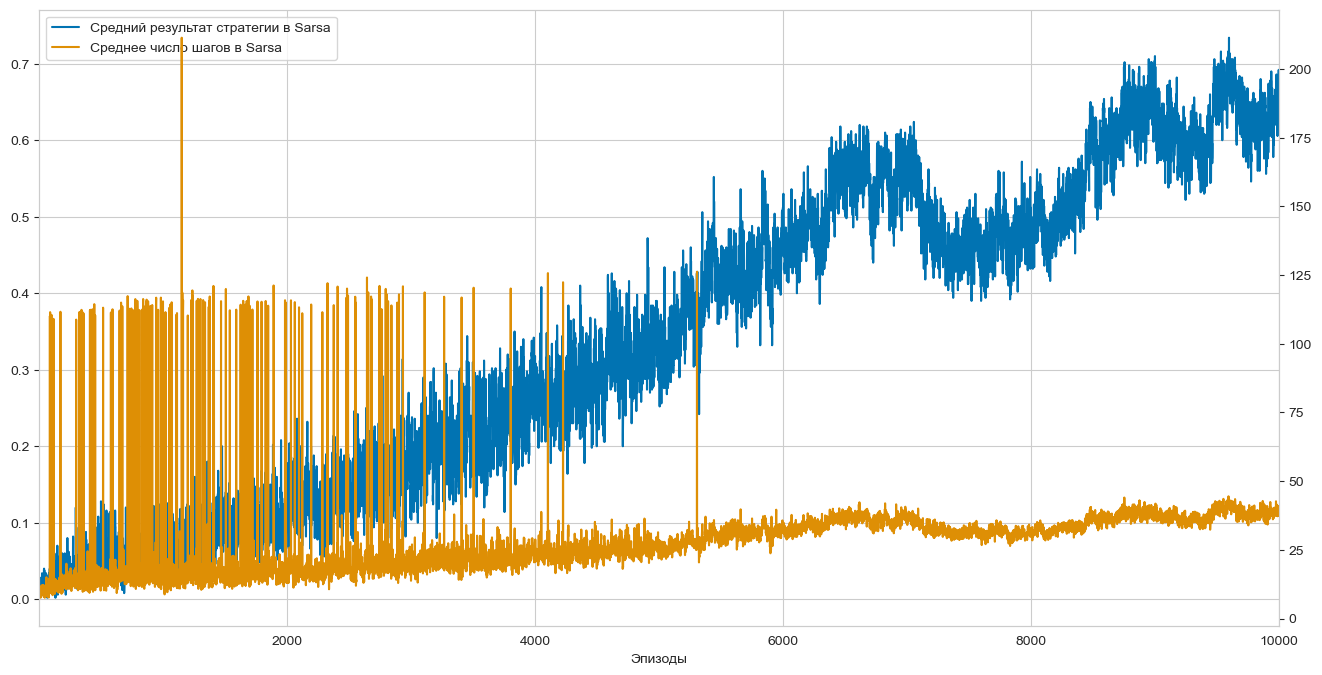

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax2 = ax.twinx()
ax2.grid(None)

avg_returns = np.mean( np.array([ [x[0] for x in res] for res in results_sarsa]), axis=1)
avg_steps = np.mean( np.array([ [x[1] for x in res] for res in results_sarsa]), axis=1)

line1 = ax.plot(np.arange(1, total_episodes+1), avg_returns, label="–°—Ä–µ–¥–Ω–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –≤ Sarsa", color="C0")
line2 = ax2.plot(np.arange(1, total_episodes+1), avg_steps, label="–°—Ä–µ–¥–Ω–µ–µ —á–∏—Å–ª–æ —à–∞–≥–æ–≤ –≤ Sarsa", color="C1")

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc=0)
# ax.set_xlim((0.5, 1.0))
# ax.legend(loc="upper right")
ax.set_xlim((1, total_episodes))
ax.set_xlabel("–≠–ø–∏–∑–æ–¥—ã")

## TD-–æ–±—É—á–µ–Ω–∏–µ: off-policy (Q-–æ–±—É—á–µ–Ω–∏–µ)

### Q-learning (off-policy TD control) –¥–ª—è –æ—Ü–µ–Ω–∫–∏‚ÄØœÄ ‚âà œÄ*

1. **–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è:**  
   –ó–∞–¥–∞—Ç—å –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è `Q(s, a)` –¥–ª—è –≤—Å–µ—Ö `s ‚àà S`, `a ‚àà A(s)`  
   –£—Å—Ç–∞–Ω–æ–≤–∏—Ç—å `Q(terminal-state, ¬∑) = 0`

2. **–ü–æ–≤—Ç–æ—Ä—è—Ç—å (–¥–ª—è –∫–∞–∂–¥–æ–≥–æ —ç–ø–∏–∑–æ–¥–∞):**  
   - –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –Ω–∞—á–∞–ª—å–Ω–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ `S`
   - **–ü–æ–≤—Ç–æ—Ä—è—Ç—å (–¥–ª—è –∫–∞–∂–¥–æ–≥–æ —à–∞–≥–∞ —ç–ø–∏–∑–æ–¥–∞):**
     - –í—ã–±—Ä–∞—Ç—å `A` –∏–∑ `S` –ø–æ –ø–æ–ª–∏—Ç–∏–∫–µ, –æ—Å–Ω–æ–≤–∞–Ω–Ω–æ–π –Ω–∞ `Q` (–Ω–∞–ø—Ä–∏–º–µ—Ä, Œµ-–∂–∞–¥–Ω–∞—è)
     - –°–æ–≤–µ—Ä—à–∏—Ç—å –¥–µ–π—Å—Ç–≤–∏–µ `A`, –ø–æ–ª—É—á–∏—Ç—å –Ω–∞–≥—Ä–∞–¥—É `R` –∏ –Ω–æ–≤–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ `S‚Ä≤`
     - –û–±–Ω–æ–≤–∏—Ç—å:
       ```
       Q(S, A) ‚Üê Q(S, A) + Œ± ¬∑ [R + Œ≥ ¬∑ max_a Q(S‚Ä≤, a) ‚àí Q(S, A)]
       ```
     - `S ‚Üê S‚Ä≤`
   - –ü–æ–∫–∞ `S` –Ω–µ —Ç–µ—Ä–º–∏–Ω–∞–ª—å–Ω–æ


![](https://habrastorage.org/webt/wf/6x/fi/wf6xfiyazgu0echvfsw8d9-oly4.png)

In [38]:
def Q_learning_episode(env, pi, Q, alpha=0.05, epsilon=0.0, gamma=0.9):
    """
    –≠–ø–∏–∑–æ–¥ –æ–±—É—á–µ–Ω–∏—è –ø–æ –∞–ª–≥–æ—Ä–∏—Ç–º—É Q-learning.

    –û–±–Ω–æ–≤–ª—è–µ—Ç Q-—Ñ—É–Ω–∫—Ü–∏—é, –ø—Ä–æ—Ö–æ–¥—è –æ–¥–∏–Ω —ç–ø–∏–∑–æ–¥ –≤ —Å—Ä–µ–¥–µ.
    –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Å—Ç—Ä–∞—Ç–µ–≥–∏—è pi –∫–∞–∫ –±–∞–∑–æ–≤–∞—è, –Ω–æ —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é epsilon –∞–≥–µ–Ω—Ç –≤—ã–±–∏—Ä–∞–µ—Ç —Å–ª—É—á–∞–π–Ω–æ–µ –¥–µ–π—Å—Ç–≤–∏–µ (exploration).
    
    –ù–∞ –∫–∞–∂–¥–æ–º —à–∞–≥–µ:
    - –ê–≥–µ–Ω—Ç –≤—ã–ø–æ–ª–Ω—è–µ—Ç –¥–µ–π—Å—Ç–≤–∏–µ a –∏ –ø–æ–ª—É—á–∞–µ—Ç (reward) –∏ –Ω–æ–≤–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ s'
    - Q-—Ñ—É–Ω–∫—Ü–∏—è –æ–±–Ω–æ–≤–ª—è–µ—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ —Å —É—á–µ—Ç–æ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ Q –≤ —Å–ª–µ–¥—É—é—â–µ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏ (greedy-–æ—Ü–µ–Ω–∫–∞)
    - –≠–ø–∏–∑–æ–¥ –∑–∞–≤–µ—Ä—à–∞–µ—Ç—Å—è, –µ—Å–ª–∏ –¥–æ—Å—Ç–∏–≥–Ω—É—Ç–æ —Ç–µ—Ä–º–∏–Ω–∞–ª—å–Ω–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ (terminated)

    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    - alpha: —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è
    - epsilon: –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –¥–µ–π—Å—Ç–≤–∏—è (–∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ)
    - gamma: –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–∏—Å–∫–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏—è
    """
    env.reset()
    s, a = env.unwrapped.s, pi[env.unwrapped.s] if np.random.rand() > epsilon else np.random.randint(nA)
    for _ in range(1000):
        observation, reward, terminated, truncated, info = env.step(a)
        s_prime, a_prime = env.unwrapped.s, pi[env.unwrapped.s] if np.random.rand() > epsilon else np.random.randint(nA)
        Q[s][a] = Q[s][a] + alpha * (reward + gamma * np.max( Q[s_prime] ) - Q[s][a])
        s, a = s_prime, a_prime
        if terminated:
            break


In [39]:
env = gym.make('FrozenLake-v1', render_mode="ansi")
env._max_episode_steps = 10000
total_episodes = 15000
gamma = 0.9


Q_hist_Qlearn = [ ]

Q = get_random_Q(env)
pi = compute_policy_by_Q(env, Q)

for n in tqdm(range(total_episodes)):
    Q_learning_episode(env, pi, Q, alpha=0.1, epsilon= 0.1, gamma=gamma)
    pi = compute_policy_by_Q(env, Q)
    Q_hist_Qlearn.append(np.copy(Q))

env.close()

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15000/15000 [00:04<00:00, 3271.24it/s]


In [40]:
print(env.render())

  (Down)
SFFF
FHFH
FFFH
HFFG



In [41]:
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

In [42]:
print("–¢–µ–∫—É—â–∞—è —Å—Ç—Ä–∞—Ç–µ–≥–∏—è:\n%s" % np.reshape(pi, (4, 4)))

–¢–µ–∫—É—â–∞—è —Å—Ç—Ä–∞—Ç–µ–≥–∏—è:
[[2 3 0 3]
 [0 0 0 0]
 [1 1 0 0]
 [0 2 1 0]]


In [43]:
np.set_printoptions(precision=6, suppress=True)
print("–ü–æ–ª—É—á–µ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è Q:\n%s" % (np.array(Q)))

–ü–æ–ª—É—á–µ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è Q:
[[0.071979 0.071638 0.072542 0.068084]
 [0.041614 0.029808 0.046526 0.065924]
 [0.072932 0.0658   0.067316 0.058246]
 [0.036513 0.030181 0.028932 0.058503]
 [0.095739 0.074639 0.065957 0.046429]
 [0.       0.       0.       0.      ]
 [0.077662 0.037228 0.074781 0.00977 ]
 [0.       0.       0.       0.      ]
 [0.070802 0.139316 0.086172 0.132838]
 [0.097787 0.285182 0.229474 0.150594]
 [0.40426  0.258216 0.336416 0.131442]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.24899  0.280683 0.42513  0.353825]
 [0.406161 0.664407 0.572853 0.528502]
 [0.       0.       0.       0.      ]]


In [44]:
# –ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–µ–º, –∫–∞–∫ —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞—é—Ç —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –∏ –∫–∞–∫ –±—ã—Å—Ç—Ä–æ —É—á–∞—Ç—Å—è
env = gym.make('FrozenLake-v1', render_mode="ansi")
env._max_episode_steps = 10000

num_experiments, num_experiments_pi = 10, 50

total_episodes = 10000
gamma = 0.9

results_Qlearn = []

Q_arr = [ get_random_Q(env) for _ in range(num_experiments) ]
pi_arr = [ compute_policy_by_Q(env, Q) for Q in Q_arr ]

for n in tqdm(range(1, total_episodes+1)):
    _ = [ Q_learning_episode(env, pi_arr[i], Q_arr[i], alpha=0.01, epsilon= 1. / (np.log(n)+1), gamma=gamma) for i in range(num_experiments) ]
    pi_arr = [ compute_policy_by_Q(env, Q) for Q in Q_arr ]
    result = [ conduct_experiments_pi(env, pi, num_experiments=num_experiments_pi) for pi in pi_arr ]
    results_Qlearn.append([ [x[0], x[1]] for x in result ])

env.close()

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [20:18<00:00,  8.21it/s]


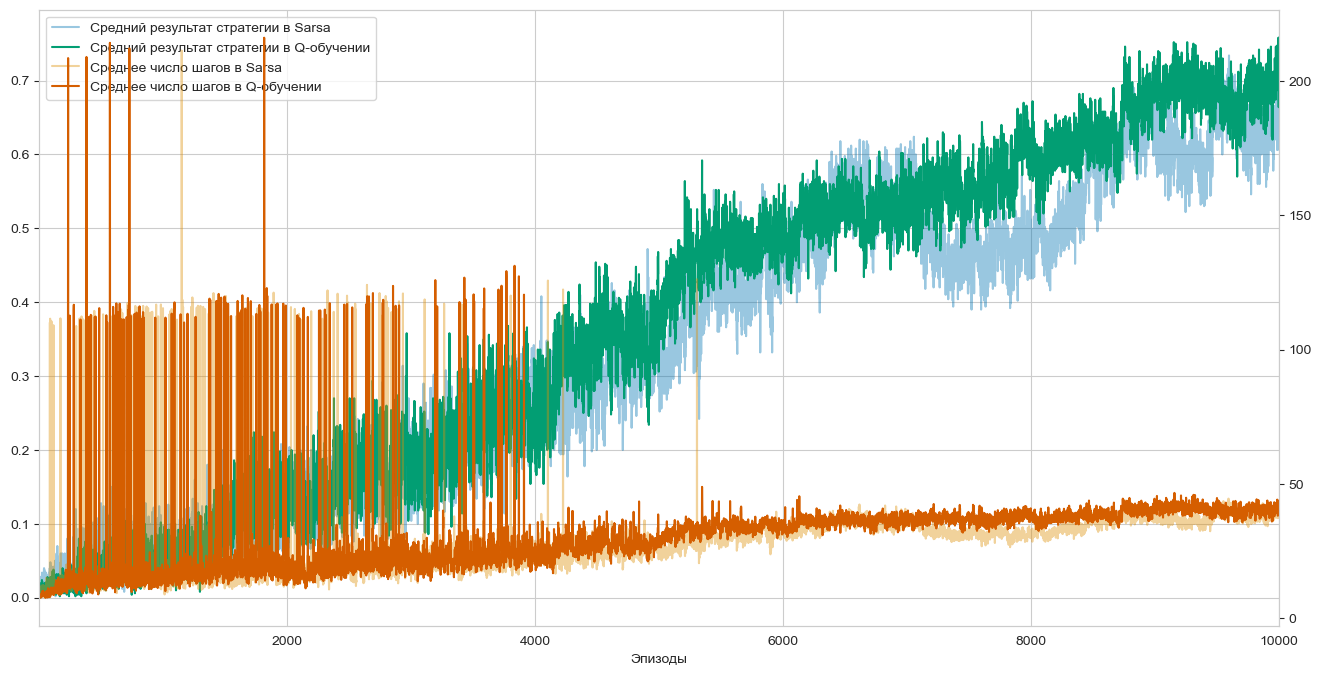

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax2 = ax.twinx()
ax2.grid(None)

avg_returns_Q = np.mean( np.array([ [x[0] for x in res] for res in results_Qlearn]), axis=1)
avg_steps_Q = np.mean( np.array([ [x[1] for x in res] for res in results_Qlearn]), axis=1)

line1 = ax.plot(np.arange(1, total_episodes+1), avg_returns, label="–°—Ä–µ–¥–Ω–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –≤ Sarsa", color="C0", alpha=0.4)
line2 = ax2.plot(np.arange(1, total_episodes+1), avg_steps, label="–°—Ä–µ–¥–Ω–µ–µ —á–∏—Å–ª–æ —à–∞–≥–æ–≤ –≤ Sarsa", color="C1", alpha=0.4)
line3 = ax.plot(np.arange(1, total_episodes+1), avg_returns_Q, label="–°—Ä–µ–¥–Ω–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –≤ Q-–æ–±—É—á–µ–Ω–∏–∏", color="C2")
line4 = ax2.plot(np.arange(1, total_episodes+1), avg_steps_Q, label="–°—Ä–µ–¥–Ω–µ–µ —á–∏—Å–ª–æ —à–∞–≥–æ–≤ –≤ Q-–æ–±—É—á–µ–Ω–∏–∏", color="C3")

lines = line1 + line3 + line2 + line4
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc="upper left")
# ax.set_xlim((0.5, 1.0))
ax.set_xlim((1, total_episodes))
ax.set_xlabel("–≠–ø–∏–∑–æ–¥—ã");